Estadísticas de los discursos:
       id_speech         year
count    14.0000    14.000000
mean      7.5000  2019.500000
std       4.1833     3.031882
min       1.0000  2014.000000
25%       4.2500  2017.250000
50%       7.5000  2020.500000
75%      10.7500  2022.000000
max      14.0000  2023.000000

Estadísticas de las oraciones:
       id_sentence   id_speech  sentence_number  sentence_length_raw  \
count  2802.000000  2802.00000      2802.000000          2802.000000   
mean   1401.500000     8.66167       192.475018            22.589579   
std     809.012052     3.12978       206.275706           137.638403   
min       1.000000     1.00000         1.000000             1.000000   
25%     701.250000     7.00000        59.000000             1.000000   
50%    1401.500000     9.00000       118.000000            16.500000   
75%    2101.750000    11.00000       206.000000            29.000000   
max    2802.000000    14.00000       841.000000          5573.000000   

       sentence_le

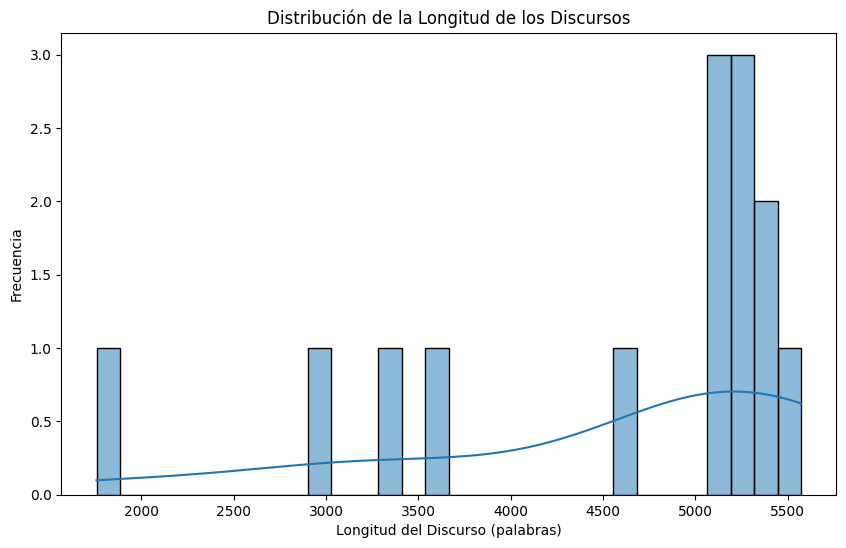

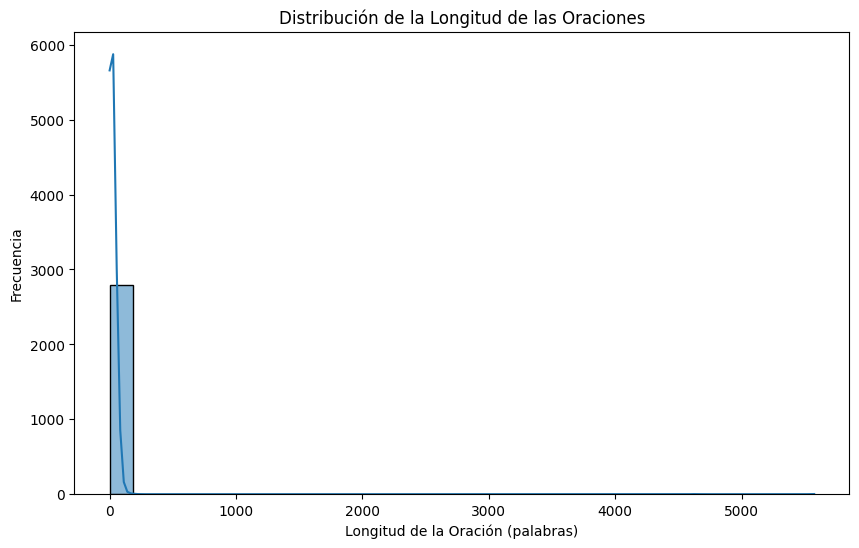

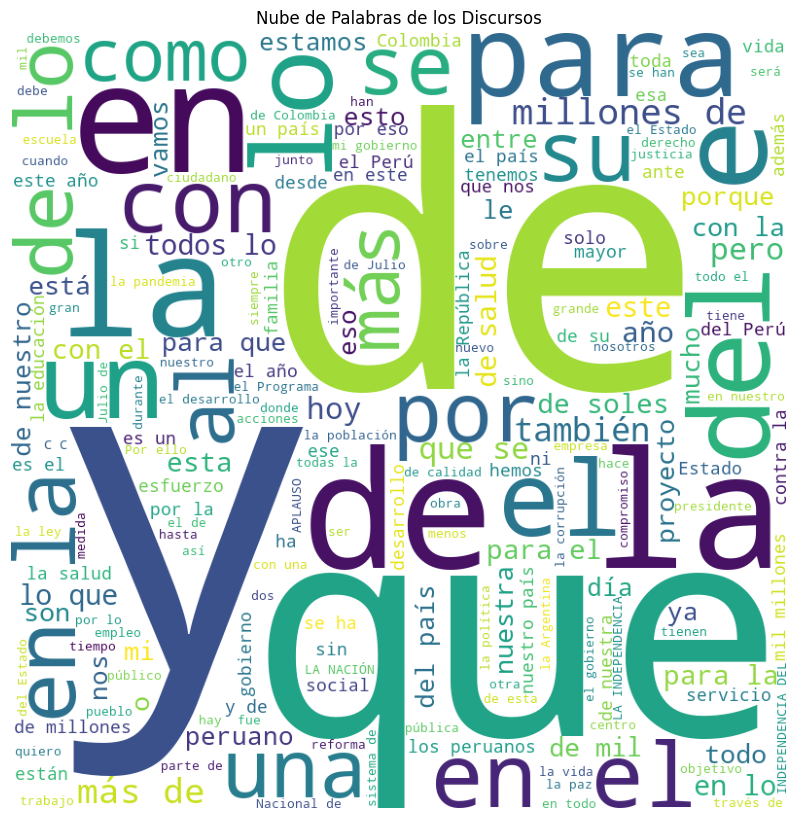

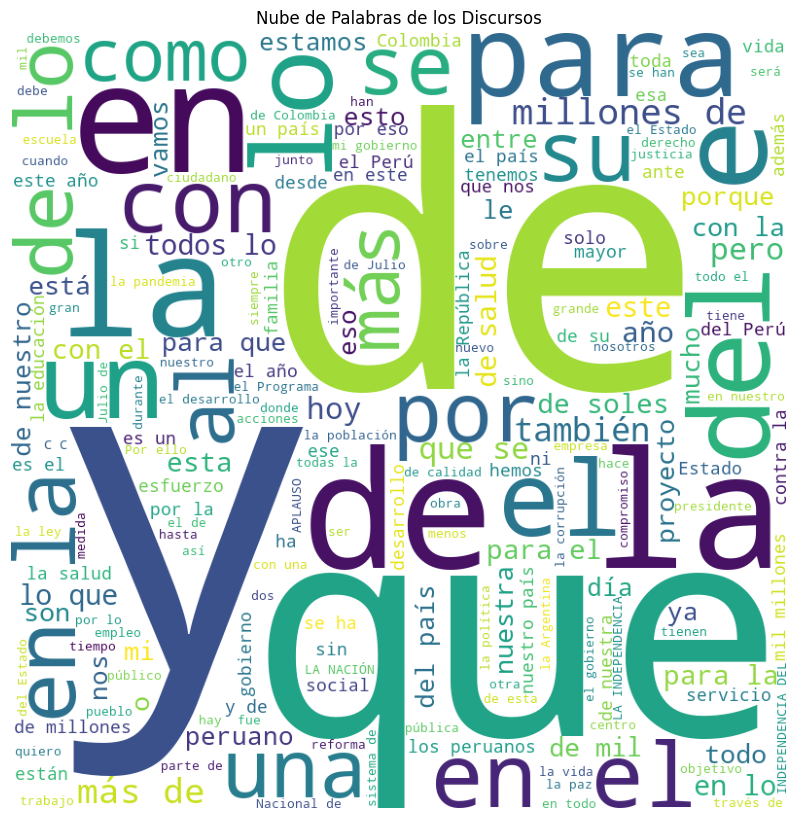

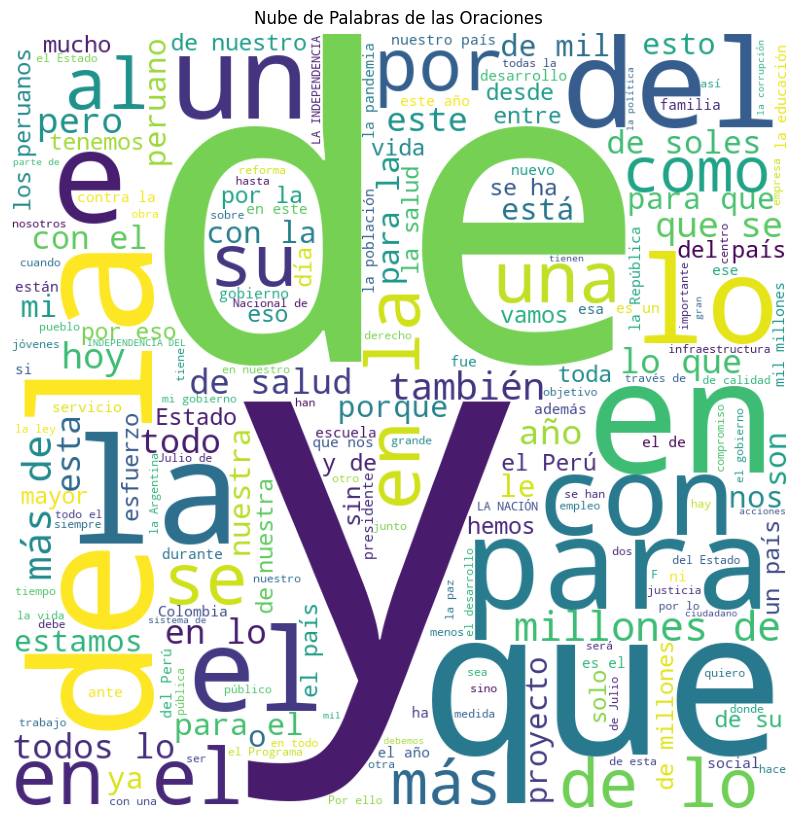

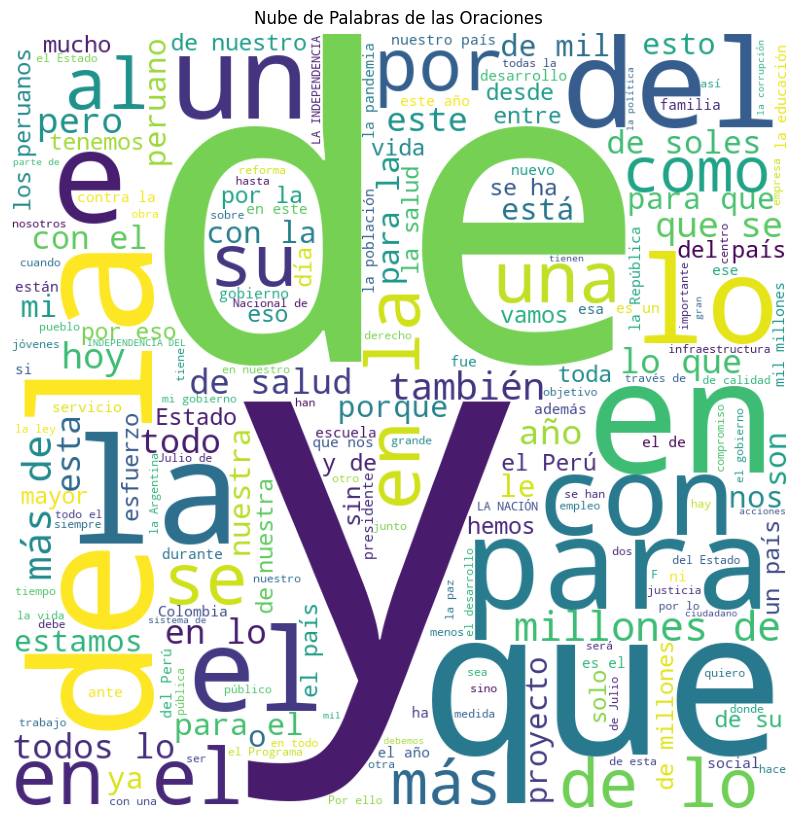

Las 10 palabras más comunes:
país: 269
mil: 234
salud: 212
millones: 207
gobierno: 193
año: 179
c: 173
hoy: 153
años: 142
perú: 131


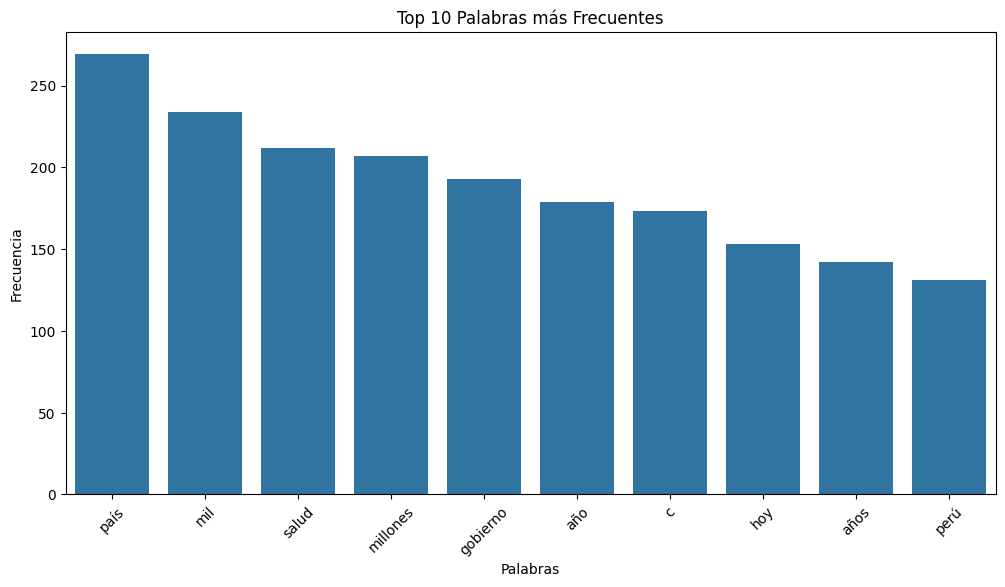

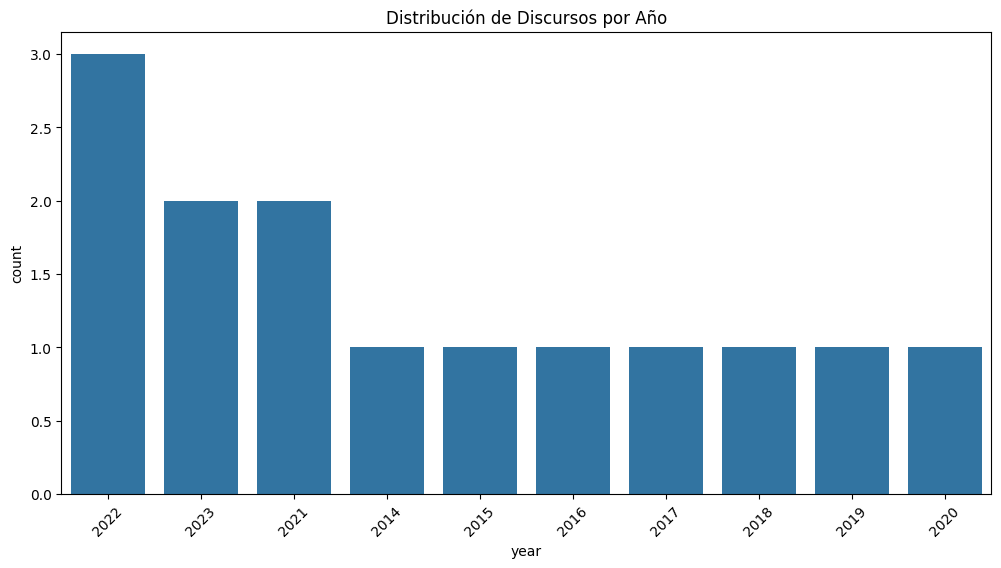

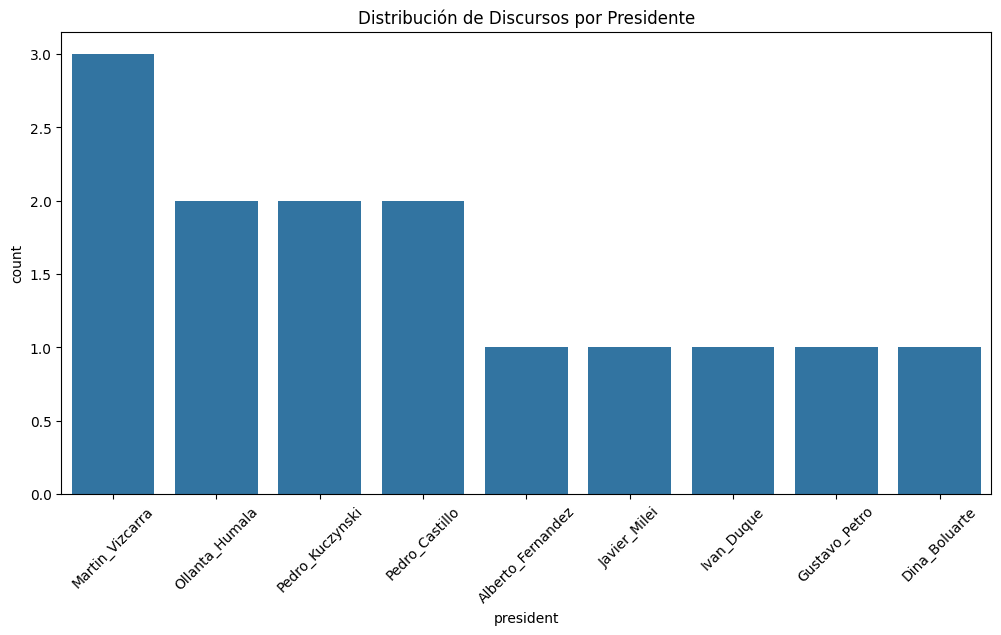

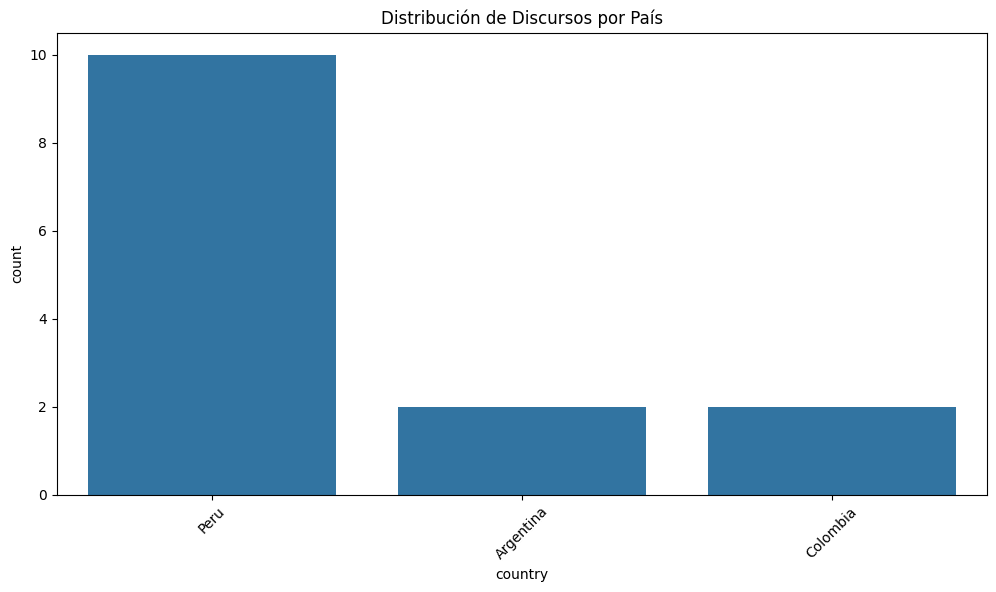

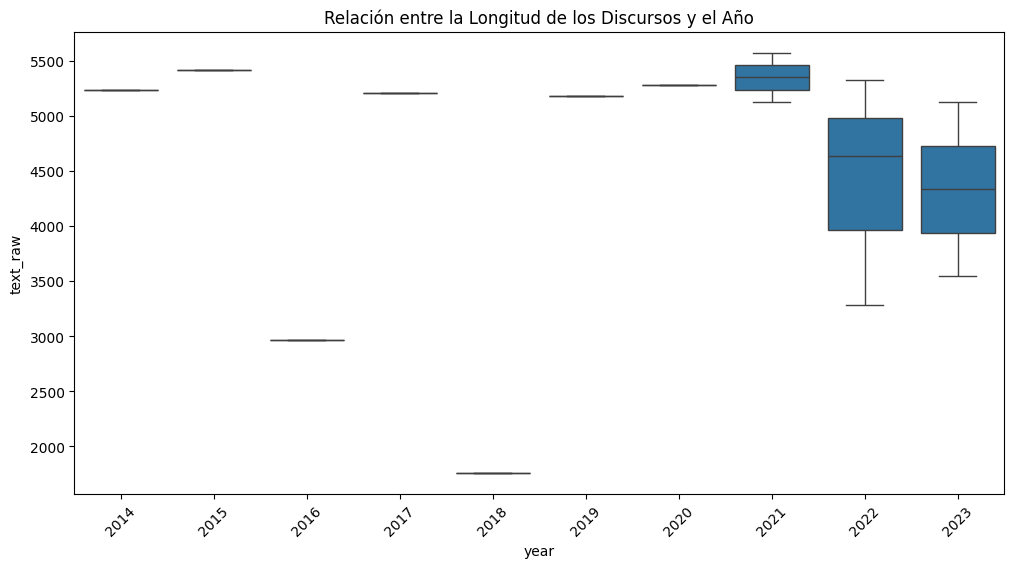

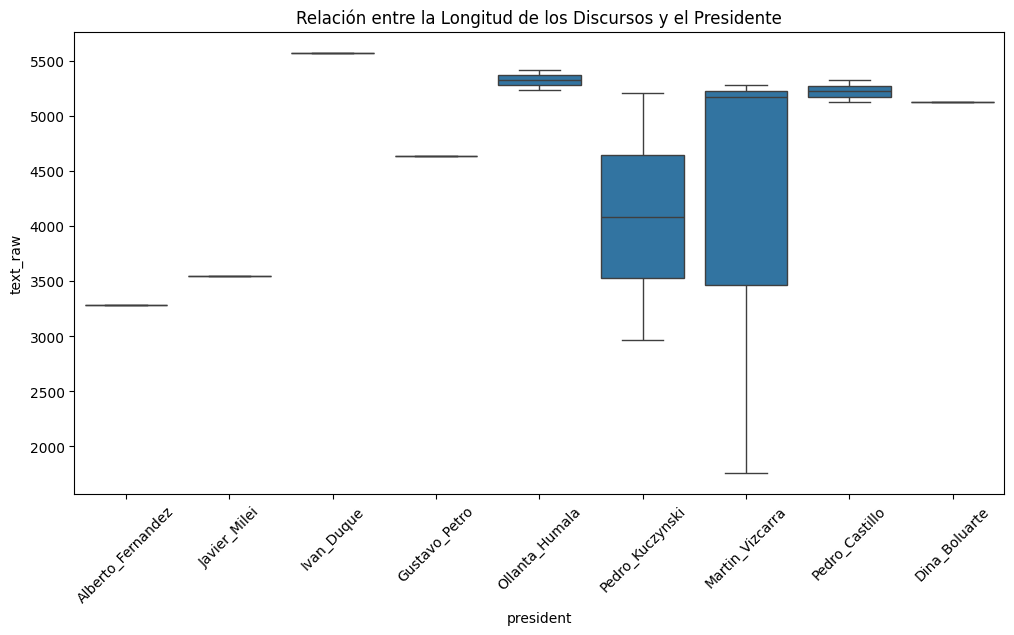

In [3]:
# notebooks/03_EDA.ipynb
# Importaciones

import os
import sys
import pandas as pd
import nltk  # Importa nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
#from initialize import download_nltk_packages

# Llama a download_nltk_packages para asegurarte de que los paquetes necesarios estén disponibles
#download_nltk_packages()

# Configuración del path
current_dir = os.getcwd()
project_root = os.path.dirname(current_dir)  
sys.path.append(project_root)

# Importa las variables y funciones necesarias
from config import XLSX_DIRECTORY
from utils.visualization_utils import (
    create_histogram,
    create_wordcloud,
    create_bar_chart,
    create_countplot,
    create_boxplot
)

# Cargar los DataFrames de los archivos Excel
df_speeches = pd.read_excel(os.path.join(XLSX_DIRECTORY, 'speech.xlsx'))
df_sentences = pd.read_excel(os.path.join(XLSX_DIRECTORY, 'sentence.xlsx'))

# Estadísticas Descriptivas
print("Estadísticas de los discursos:")
print(df_speeches.describe())
print("\nEstadísticas de las oraciones:")
print(df_sentences.describe())

# Utilizando funciones de visualization_utils.py
# Histograma de la longitud de los discursos
create_histogram(
    df_speeches['text_raw'].apply(lambda x: len(x.split())), 
    "Distribución de la Longitud de los Discursos", 
    "Longitud del Discurso (palabras)", 
    "Frecuencia"
)

# Histograma de la longitud de las oraciones
create_histogram(
    df_sentences['sentence_length_raw'], 
    "Distribución de la Longitud de las Oraciones", 
    "Longitud de la Oración (palabras)", 
    "Frecuencia"
)

# Nube de palabras de los discursos
create_wordcloud(
    ' '.join(df_speeches['text_raw']), 
    "Nube de Palabras de los Discursos"
)

# Nube de palabras de las oraciones
# Filtrar y unir solo las oraciones que no estén vacías
sentences_str = [str(s) for s in df_sentences['sentence_clean'] if pd.notna(s) and s != '']
create_wordcloud(
    ' '.join(sentences_str), 
    "Nube de Palabras de las Oraciones"
)


# Función para contar palabras no stopwords
def count_non_stopwords(text):
    words = word_tokenize(text.lower())
    non_stopwords = [word for word in words if word.isalpha() and word not in set(stopwords.words('spanish'))]
    return Counter(non_stopwords)

# Contar palabras en todos los discursos
word_counts = Counter()
df_speeches['text_raw'].apply(lambda text: word_counts.update(count_non_stopwords(text)))

# Las 10 palabras más comunes
most_common_words = word_counts.most_common(10)
print("Las 10 palabras más comunes:")
for word, count in most_common_words:
    print(f"{word}: {count}")

# Gráfico de barras para las 10 palabras más comunes
create_bar_chart(
    dict(most_common_words), 
    'Top 10 Palabras más Frecuentes', 
    'Palabras', 
    'Frecuencia'
)

# Distribución de discursos por año
create_countplot(
    df_speeches, 
    'year', 
    'Distribución de Discursos por Año', 
    df_speeches['year'].value_counts().index
)

# Distribución de discursos por presidente
create_countplot(
    df_speeches, 
    'president', 
    'Distribución de Discursos por Presidente', 
    df_speeches['president'].value_counts().index
)

# Distribución de discursos por país
create_countplot(
    df_speeches, 
    'country', 
    'Distribución de Discursos por País', 
    df_speeches['country'].value_counts().index
)

# Relación entre la longitud de los discursos y el año
create_boxplot(
    df_speeches, 
    'year', 
    df_speeches['text_raw'].apply(lambda x: len(x.split())), 
    'Relación entre la Longitud de los Discursos y el Año'
)

# Relación entre la longitud de los discursos y el presidente
create_boxplot(
    df_speeches, 
    'president', 
    df_speeches['text_raw'].apply(lambda x: len(x.split())), 
    'Relación entre la Longitud de los Discursos y el Presidente'
)



#ojo
#Los análisis y visualizaciones específicos deben estar guiados por las preguntas o hipótesis que este explorando en el proyecto.

In [14]:
# pip install seaborn
# pip install wordcloud